In [1]:

#1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên
import pandas as pd
def load_data(filename):
  return pd.read_csv(filename)

filename = 'titanic_disaster.csv'
df = load_data(filename)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

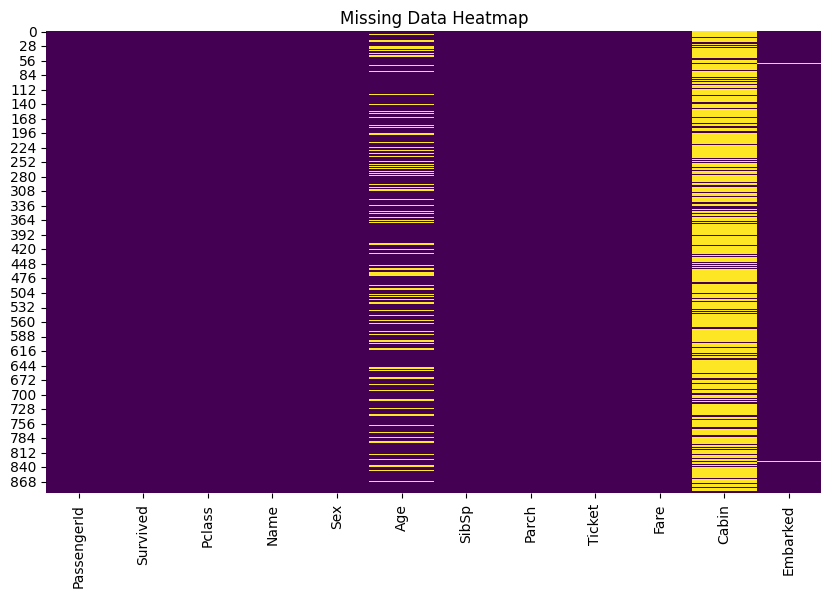

In [2]:

#2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
dfage = df[df['Age'].isna()] # Changed 'tidisater' to 'df' and corrected the syntax for filtering
print(dfage)

dfcabin = df[df['Cabin'].isna()] # Changed 'tidisater' to 'df', corrected the syntax, and assigned to dfcabin
print(dfcabin)

dfembarked = df[df['Embarked'].isna()] # Changed 'tidisater' to 'df', corrected the syntax, and assigned to dfembarked
print(dfembarked)

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [3]:

#3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name
df[['FirstName','secondName']] = df['Name'].str.split(',',expand = True) # Changed 'tidisater' to 'df' to use the correct DataFrame
df = df.drop("Name", axis=1) # Changed 'tidisater' to 'df' and corrected column name to 'Name' for dropping
df.head(5) # Display the first 5 rows of the modified DataFrame

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [4]:

#4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F
def substibute_Sex(x_df):
  mapping={'male' : 'M', 'female' : 'F'}
  x_df['Sex']=x_df['Sex'].map(mapping)
  return x_df

df = df.pipe(substibute_Sex) # Changed 'df_splitname' to 'df' to use the existing DataFrame
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


<Axes: xlabel='Pclass', ylabel='Age'>

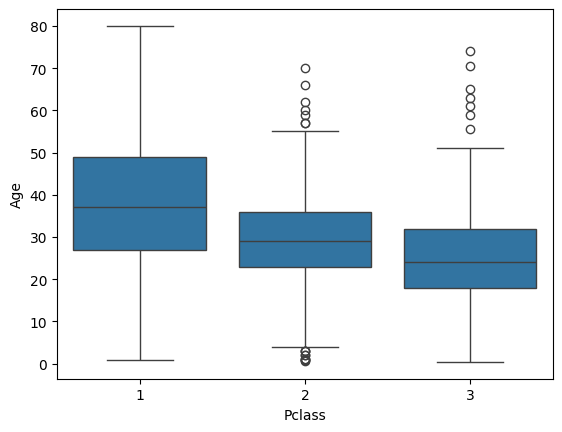

In [5]:

#5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
#a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.
import seaborn as sns
import pandas as pd

# Hàm tải dữ liệu Titanic
def tidisaster(filename):
    df = pd.read_csv(filename)
    return df

# Tải dữ liệu Titanic từ tệp
filename = 'titanic_disaster.csv'
tidisater5 = tidisaster(filename)  # Lưu kết quả vào biến tidisater5

# Vẽ biểu đồ boxplot
sns.boxplot(y='Age', x='Pclass', data=tidisater5)

Trước khi thay thế giá trị thiếu:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Sau khi thay thế giá trị thiếu:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            147
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


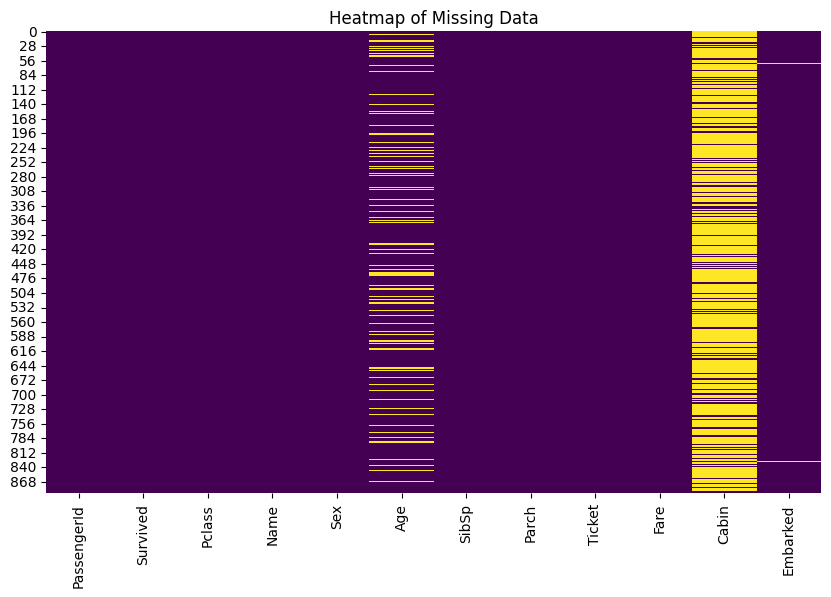

In [6]:

#b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map

# Hiển thị thông tin về các giá trị thiếu trước khi thay thế
print("Trước khi thay thế giá trị thiếu:")
print(tidisater5.isnull().sum())  # Kiểm tra số lượng giá trị thiếu trong từng cột

# Thay thế giá trị thiếu trong cột 'Age' chỉ cho các dòng có Pclass == 1
mean_age_pclass_1 = tidisater5[tidisater5["Pclass"] == 1]["Age"].mean()  # Tính giá trị trung bình Age của Pclass == 1
tidisater5.loc[(tidisater5["Pclass"] == 1) & (tidisater5["Age"].isnull()), "Age"] = mean_age_pclass_1  # Thay thế Age bị thiếu

# Hiển thị kết quả sau khi thay thế giá trị thiếu
print("\nSau khi thay thế giá trị thiếu:")
print(tidisater5.isnull().sum())  # Kiểm tra lại số lượng giá trị thiếu

# Vẽ biểu đồ heatmap để trực quan hóa các giá trị thiếu (null)
plt.figure(figsize=(10, 6))
sns.heatmap(tidisater5.isnull(), cbar=False, cmap='viridis')  # 'viridis' là màu sắc gradient
plt.title('Heatmap of Missing Data')
plt.show()

In [7]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('titanic_disaster.csv')

#6: Tạo biến Agegroup dựa trên độ tuổi
def map_age_to_group(age):
    if pd.isna(age):
        return "Unknown"
    elif age <= 12:
        return "Kid"
    elif age <= 18:
        return "Teen"
    elif age <= 60:
        return "Adult"
    else:
        return "Older"

df['Agegroup'] = df['Age'].apply(map_age_to_group)

# Xuất kết quả ra terminal
print("First 10 rows of Age and Agegroup:")
print(df[['Age', 'Agegroup']].head(10))
print("\nValue counts of Agegroup:")
print(df['Agegroup'].value_counts())

First 10 rows of Age and Agegroup:
    Age Agegroup
0  22.0    Adult
1  38.0    Adult
2  26.0    Adult
3  35.0    Adult
4  35.0    Adult
5   NaN  Unknown
6  54.0    Adult
7   2.0      Kid
8  27.0    Adult
9  14.0     Teen

Value counts of Agegroup:
Agegroup
Adult      553
Unknown    177
Teen        70
Kid         69
Older       22
Name: count, dtype: int64


In [8]:
#7: Trích xuất danh xưng (namePrefix) từ trường Name
def extract_title(name):
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df['namePrefix'] = df['Name'].apply(extract_title)

In [9]:

#8: Tính toán familySize = 1 + SibSp + Parch
df['familySize'] = 1 + df['SibSp'] + df['Parch']

In [10]:

#9: Tạo đặc trưng 'Alone' dựa trên familySize
df['Alone'] = (df['familySize'] == 1).astype(int)

In [11]:

#10: Trích xuất loại cabin (typeCabin) từ Cabin
def extract_cabin_type(cabin):
    if pd.isna(cabin) or cabin == "":
        return "Unknown"
    return cabin[0]  # Ký tự đầu tiên đại diện cho loại cabin

df['typeCabin'] = df['Cabin'].apply(extract_cabin_type)

# Hiển thị DataFrame sau khi thực hiện các biến đổi
print("\n\nDATAFRAME SAU KHI BIẾN ĐỔI:")
display(df.head())  # Dùng display() thay vì print() để hiển thị rõ hơn trong Colab

# Hiển thị kích thước dữ liệu
print("\nKích thước bộ dữ liệu:")
print(f"Số hàng, số cột: {df.shape}")

# Hiển thị mẫu dữ liệu đã biến đổi
print("\nNăm dòng đầu tiên sau khi biến đổi:")
sample = df[['PassengerId', 'Survived', 'Pclass', 'namePrefix',
             'Agegroup', 'familySize', 'Alone', 'typeCabin']].head(5)
display(sample)  # Dùng display()

# Lưu bộ dữ liệu đã xử lý
df.to_csv('titanic_processed.csv', index=False)

# Thống kê mô tả
print("\nPhân bố Agegroup:")
display(df['Agegroup'].value_counts())  # Dùng display()

print("\nPhân bố danh xưng (namePrefix):")
display(df['namePrefix'].value_counts())

print("\nPhân bố loại cabin:")
display(df['typeCabin'].value_counts())

print("\nPhân bố kích thước gia đình:")
display(df['familySize'].value_counts().sort_index())

print("\nTỷ lệ phần trăm hành khách đi một mình:")
alone_pct = df['Alone'].mean() * 100
print(f"{alone_pct:.2f}%")

# Hiển thị thêm một số thống kê hữu ích
print("\nTỷ lệ sống sót theo nhóm tuổi:")
survival_by_age = df.groupby('Agegroup')['Survived'].mean() * 100
display(survival_by_age)

print("\nTỷ lệ sống sót theo danh xưng phổ biến:")
common_titles = df['namePrefix'].value_counts().head(5).index
survival_by_title = df[df['namePrefix'].isin(common_titles)].groupby('namePrefix')['Survived'].mean() * 100
display(survival_by_title)

print("\nTỷ lệ sống sót theo loại cabin:")
survival_by_cabin = df.groupby('typeCabin')['Survived'].mean() * 100
display(survival_by_cabin)

print("\nTỷ lệ sống sót theo tình trạng đi một mình hay không:")
survival_by_alone = df.groupby('Alone')['Survived'].mean() * 100
print(f"Đi một mình: {survival_by_alone[1]:.2f}%")
print(f"Đi cùng gia đình: {survival_by_alone[0]:.2f}%")



DATAFRAME SAU KHI BIẾN ĐỔI:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Mr,2,0,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,2,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Miss,1,1,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs,2,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,Mr,1,1,Unknown



Kích thước bộ dữ liệu:
Số hàng, số cột: (891, 17)

Năm dòng đầu tiên sau khi biến đổi:


,PassengerId,Survived,Pclass,namePrefix,Agegroup,familySize,Alone,typeCabin
0,1,0,3,Mr,Adult,2,0,Unknown
1,2,1,1,Mrs,Adult,2,0,C
2,3,1,3,Miss,Adult,1,1,Unknown
3,4,1,1,Mrs,Adult,2,0,C
4,5,0,3,Mr,Adult,1,1,Unknown



Phân bố Agegroup:


Agegroup
Adult      553
Unknown    177
Teen        70
Kid         69
Older       22
Name: count, dtype: int64


Phân bố danh xưng (namePrefix):


namePrefix
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


Phân bố loại cabin:


typeCabin
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64


Phân bố kích thước gia đình:


familySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


Tỷ lệ phần trăm hành khách đi một mình:
60.27%

Tỷ lệ sống sót theo nhóm tuổi:


Agegroup
Adult      38.878843
Kid        57.971014
Older      22.727273
Teen       42.857143
Unknown    29.378531
Name: Survived, dtype: float64


Tỷ lệ sống sót theo danh xưng phổ biến:


namePrefix
Dr        42.857143
Master    57.500000
Miss      69.780220
Mr        15.667311
Mrs       79.200000
Name: Survived, dtype: float64


Tỷ lệ sống sót theo loại cabin:


typeCabin
A          46.666667
B          74.468085
C          59.322034
D          75.757576
E          75.000000
F          61.538462
G          50.000000
T           0.000000
Unknown    29.985444
Name: Survived, dtype: float64


Tỷ lệ sống sót theo tình trạng đi một mình hay không:
Đi một mình: 30.35%
Đi cùng gia đình: 50.56%
